In [ ]:
# Call Center Cleanup

For this assignment, we will be working with call center data. You can start working on the assignment after the first lesson on Exploratory Data Analysis with pandas. Make sure to read the whole assignment before starting anything! As you code along in the Jupyter notebook, you are asked to make note of the results of your analysis. Do so by clicking on the results box and adding your notes beside each question.

## Business Issue and Understanding

You are working for a company that has two call centers: the North Call Center and the South Call Center. The company is looking to possibly hire five additional reps to enhance customer experience. Your task is to explore how efficient the current reps are in each branch to determine which branch would benefit from additional assistance.

### How the Call Center Works

Call center representatives are assigned queues. When calls are assigned to a queue, the call is assigned to the next person in line in the queue. After a call is assigned to a representative, the amount of time between assignment and the call starting is divided into busy minutes and not ready minutes. If the call is incoming and a customer is waiting on the phone for a rep, the time is split into three categories: busy minutes, not ready minutes, and incoming call wait time. Once the rep has the customer on the phone, there might be during call wait time, where the call is put on hold while the rep gets an answer for the customer.

### Notes about the Dataset

If you haven't worked in a call center before, these notes might help you throughout your analysis.

* The call purpose is tagged for each call.
* The time of the call is tagged in 1 hour blocks starting at 9:00 AM and ending at 5:00 PM.
* Calls are tagged as incoming or outgoing.
* Reps are assigned to queues. When the reps are working, they take calls in the order of their queue.
* A call that is dropped due to technical error or missed by the center because they have reached maximum capacity is a lost call.
* An abandoned call is when the customer hangs up because they have been waiting for too long.
* Busy Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are busy with other customers.
* Not Ready Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are not ready (for example, getting water).
* Incoming Wait Time - amount of time after assigned rep is available to take the call customer waits for representative to pick up a call. This is tracked in seconds.
* During Call Wait Time - amount of time during call that customer has to wait for representative

## Getting Started

You have two CSVs at your disposal, `NorthCallCenter.csv` and `SouthCallCenter.csv`. Import the appropriate libraries and create two dataframes, one called `north_df` and one called `south_df`.

In [3]:
# Import the appropriate libraries with aliases
import pandas as pd
import numpy as np
# Create two new dataframes
north_df = pd.read_csv(r"C:NorthCallCenter.csv")
south_df = pd.read_csv(r"C:SouthCallCenter.csv")
#checking if the dataframes were created sucessfully...
print(north_df.head(5))
print(south_df.head(5))
print(north_df.tail(5))
print(south_df.tail(5))
#checking for the summary of the dataframes
print(north_df.info())
print(south_df.info())

   Unnamed: 0 Branch     Call Purpose Time Block Incoming or Outgoing Queue  \
0           0  North        Complaint    9:00 AM             Incoming     B   
1           1  North    Sales Support   11:00 AM             Incoming     A   
2           2  North    Sales Support   11:00 AM             Incoming     B   
3           3  North    Sales Support    4:00 PM             Incoming     B   
4           4  North  Product Support   12:00 PM             Incoming     B   

  Rep ID Sale  Lost Call  Abandoned  Busy Minutes  Not Ready Minutes  \
0  Brent   NO          0          1             9                  2   
1    Cam   NO          0          0            11                  1   
2   Todd   NO          0          0             9                  3   
3  Brent   NO          0          0            11                  2   
4  Brent   NO          0          0             8                  2   

   Incoming Wait Time  During Call Wait Time  Calls  
0                 1.0                 

## Task 1: Exploratory Data Analysis

Time to do some EDA! In the process of learning more about the two datasets, answer the following questions. Use the code blocks below to begin cleaning your data. At the end of the section, record your answers.

#### EDA Question 1A:  How many reps are in the North branch?  

In [2]:
# EDA Question 1A solution below:
9

In [9]:
north_branch_reps = north_df['Rep ID'].nunique()
print(north_branch_reps)

9


#### EDA Question 1B:  How many reps are in the South branch?  

In [10]:
# EDA Question 1B solution Below:
11

In [11]:
south_branch_reps = south_df['Rep ID'].nunique()
print(south_branch_reps)

11


#### EDA Question 2A:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the North branch? 

In [2]:
# EDA Question 2A solution Below:
#North branch

In [14]:
print(list(north_df.columns))

['Unnamed: 0', 'Branch', 'Call Purpose', 'Time Block', 'Incoming or Outgoing', 'Queue', 'Rep ID', 'Sale', 'Lost Call', 'Abandoned', 'Busy Minutes', 'Not Ready Minutes', 'Incoming Wait Time', 'During Call Wait Time', 'Calls']


In [16]:
average_north_branch = north_df[['Busy Minutes', 'Not Ready Minutes', 'Incoming Wait Time', 'During Call Wait Time']].mean().round(2)
print(average_north_branch)

Busy Minutes             9.99
Not Ready Minutes        1.91
Incoming Wait Time       3.05
During Call Wait Time    2.97
dtype: float64


#### EDA Question 2B:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the South branch? 

In [3]:
# EDA Question 2B solution Below:
# South branch

In [18]:
print(list(south_df.columns))

['Unnamed: 0', 'Branch', 'Call Purpose', 'Time Block', 'Incoming or Outgoing', 'Queue', 'Rep ID', 'Sale', 'Lost Call', 'Abandoned', 'Busy Minutes', 'Not Ready Minutes', 'Incoming Wait Time', 'During Call Wait Time', 'Calls']


In [19]:
average_south_branch = south_df[['Busy Minutes', 'Not Ready Minutes', 'Incoming Wait Time', 'During Call Wait Time']].mean().round(2)
print(average_south_branch)

Busy Minutes             10.05
Not Ready Minutes         1.91
Incoming Wait Time        3.00
During Call Wait Time     3.08
dtype: float64


#### EDA Question 3:  What is the number of calls taken for each time block(Both North and South combined)?

In [6]:
# EDA Question 3 solution Below:
# Both North and South combined

In [4]:
combined_df = pd.concat([north_df,south_df], ignore_index = True)
calls_each_time_block = combined_df.groupby('Time Block')['Calls'].sum().sort_values(ascending=False)
print(calls_each_time_block)

Time Block
12:00 PM    120
10:00 AM     99
3:00 PM      73
2:00 PM      65
11:00 AM     56
4:00 PM      53
5:00 PM      43
1:00 PM      40
9:00 AM      10
Name: Calls, dtype: int64


##### Record your answers for the EDA section below:
- 1a) Reps in the North Branch = 9
- 1b) Reps in the South Branch = 11


- 2a) North Branch, (round to the nearest hundredth):
> - Busy Minutes = 9.99
> - Not Ready Minutes = 1.91
> - Incoming Wait Time = 3.05
> - During Call Wait Time = 2.97
- 2b) South Branch, (round to the nearest hundredth):
> - Busy Minutes = 10.05
> - Not Ready Minutes = 1.91
> - Incoming Wait Time = 3.00
> - During Call Wait Time = 3.08
- 3) Total Calls taken for all branches per time block:
> - 9:00AM   = 10
> - 10:00AM  = 99
> - 11:00AM  = 56
> - 12:00PM  = 120
> - 1:00PM   = 40
> - 2:00PM   = 65
> - 3:00PM   = 73
> - 4:00PM   = 53
> - 5:00PM   = 43



## Task 2: Cleaning Your Data 
Now you need to clean up the datasets. When cleaning the datasets, you may find that there isn't dirty data to clean. That is okay! Some questions you need to answer about the data sets.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. 

#### Cleaning Question 1:  Is there any missing data and if yes explain what you would do with the missing data and why?

In [44]:
# Cleaning Question 1 solution below:
print(north_df.isnull().sum())
print(north_df['Incoming Wait Time'].describe())


Unnamed: 0                 0
Branch                     0
Call Purpose               0
Time Block                 0
Incoming or Outgoing       0
Queue                      0
Rep ID                     0
Sale                       0
Lost Call                  0
Abandoned                  0
Busy Minutes               0
Not Ready Minutes          0
Incoming Wait Time       163
During Call Wait Time      0
Calls                      0
dtype: int64
count    82.000000
mean      3.048780
std       1.456382
min       1.000000
25%       2.000000
50%       3.000000
75%       4.000000
max       5.000000
Name: Incoming Wait Time, dtype: float64


In [42]:
print(south_df.isnull().sum())

Unnamed: 0                 0
Branch                     0
Call Purpose               0
Time Block                 0
Incoming or Outgoing       0
Queue                      0
Rep ID                     0
Sale                       0
Lost Call                  0
Abandoned                  0
Busy Minutes               0
Not Ready Minutes          0
Incoming Wait Time       188
During Call Wait Time      0
Calls                      0
dtype: int64


#### Record your answer below:

> Your Answer:Most of the columns in north branch has 0 missing value except Incoming wait time which has 163 missing values.
> Similarly in south branch Incoming wait time column has 188 missing values and all other columns has 0 missing values.
> For now i would like to leave as is with NaN for outgoing calls.So there will be the distiction between incoming and outgoing calls and observe null values in the 'Incoming Wait Time' column. These null values correspond to outgoing calls, which naturally don't have an incoming wait time.

#### Cleaning Question 2:  In the North data set, there are two separate "YES" values for a sale. Why and how did you rectify the issue?

In [21]:
# Cleaning Question 2 solution below:
yes_variations = (north_df['Sale'].unique())
print(yes_variations)
yes_count = north_df['Sale'].str.contains('YES',case = False, na= False).sum()
print(yes_count)
north_df.loc[:,'Sale'] = north_df['Sale'].str.rstrip()
north_df['Sale']

['NO' 'YES']
11


0      NO
1      NO
2      NO
3      NO
4      NO
       ..
240    NO
241    NO
242    NO
243    NO
244    NO
Name: Sale, Length: 245, dtype: object

##### Record your answer by below:
> Your Answer: with variable yes_variations i checked for unique values in the sales column and i noticed there are two separate 'Yes' values. one with trailing space and one without trailing space.This could be due to inconsistency in the data entry.
> confirmed by the yes_count that 11 rows are affected.
> cleaning it with str.rstrip function.
> This inconsisntency data can lead to problems in data analysis and reporting.

#### Cleaning Question 3:  Are there duplicates in the two data sets? If there are, how did you handle them?

In [72]:
# Cleaning Question 3 solution below:
north_duplicates = north_df.duplicated().sum()
print(north_duplicates)

0


In [74]:
south_duplicates = south_df.duplicated().sum()
print(south_duplicates)

0


##### Record your answer below:
> Your Answer: I dont see any duplicates in two data sets.
> If there were any duplicates i would have used .drop_duplicates, keeping the first occurence of each duplicates.

#### Cleaning Question 4:  Is any of the data in the two data sets unnecessary? If yes, how did you handle it?

In [75]:
# Cleaning Question 4 solution below:
north_df = north_df.info()
print(north_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             245 non-null    int64  
 1   Branch                 245 non-null    object 
 2   Call Purpose           245 non-null    object 
 3   Time Block             245 non-null    object 
 4   Incoming or Outgoing   245 non-null    object 
 5   Queue                  245 non-null    object 
 6   Rep ID                 245 non-null    object 
 7   Sale                   245 non-null    object 
 8   Lost Call              245 non-null    int64  
 9   Abandoned              245 non-null    int64  
 10  Busy Minutes           245 non-null    int64  
 11  Not Ready Minutes      245 non-null    int64  
 12  Incoming Wait Time     82 non-null     float64
 13  During Call Wait Time  245 non-null    int64  
 14  Calls                  245 non-null    int64  
dtypes: flo

In [ ]:
# df.drop['Sale', axis = 1, inplace = True]

In [91]:
south_df = south_df.info()
print(south_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314 entries, 0 to 313
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             314 non-null    int64  
 1   Branch                 314 non-null    object 
 2   Call Purpose           314 non-null    object 
 3   Time Block             314 non-null    object 
 4   Incoming or Outgoing   314 non-null    object 
 5   Queue                  314 non-null    object 
 6   Rep ID                 314 non-null    object 
 7   Sale                   314 non-null    object 
 8   Lost Call              314 non-null    int64  
 9   Abandoned              314 non-null    int64  
 10  Busy Minutes           314 non-null    int64  
 11  Not Ready Minutes      314 non-null    int64  
 12  Incoming Wait Time     126 non-null    float64
 13  During Call Wait Time  314 non-null    int64  
 14  Calls                  314 non-null    int64  
dtypes: flo

##### Record your answer below:
> Your Answer:Yes, looking at both the data sets i think 'Sale' column data is unnecessary.I will use .drop function to remove the column with axis = 1 so that the column 'Sale' is deleted.

## Task 3: Data Manipulation
Before you begin answering any questions, combine the two datasets together to create a third dataframe called df. You can use this third dataframe to compare the two call centers to company-wide trends.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. Record your answer below.

In [102]:
import pandas as pd
import numpy as np 
north_df = pd.read_csv(r"C:NorthCallCenter.csv")
south_df = pd.read_csv(r"C:SouthCallCenter.csv")
north_df.head(5)


,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1


In [103]:
south_df.head(5)

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,South,Sales Support,10:00 AM,Incoming,D,Kate,NO,0,0,9,1,1.0,2,1
1,1,South,Sales Support,10:00 AM,Incoming,C,Eric,NO,0,0,8,2,1.0,4,1
2,2,South,Sales Support,10:00 AM,Incoming,C,Susan,NO,0,0,10,2,1.0,4,1
3,3,South,Sales Support,10:00 AM,Incoming,C,Alice,NO,0,0,12,1,1.0,3,1
4,4,South,Sales Support,12:00 PM,Incoming,C,Sandy,NO,0,0,8,3,1.0,3,1


In [14]:
# Create dataframe for the entire company named df:
df = pd.concat([north_df,south_df],ignore_index = True)
df

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
554,309,South,Product Support,5:00 PM,Outgoing,D,Helga,NO,0,0,10,3,NaN,4,1
555,310,South,Product Support,5:00 PM,Outgoing,C,Susan,NO,0,0,12,3,NaN,4,1
556,311,South,Product Support,5:00 PM,Outgoing,C,Sandy,NO,0,0,9,3,NaN,4,1
557,312,South,Product Support,5:00 PM,Outgoing,C,Eric,NO,0,0,10,1,NaN,2,1


#### Manipulation Question 1:  Group by Rep ID and sum the resulting structure. Sort by calls to determine which rep in each branch has the highest number of calls.

In [15]:
# Manipulation Question solution below:
group_rep = df.groupby(['Branch','Rep ID'])['Calls'].sum().reset_index()
group_rep_sorted = group_rep.sort_values(['Branch','Calls'],ascending = [True, False])
rep_highest_calls = group_rep_sorted.groupby('Branch').first().reset_index()
print(rep_highest_calls)
                                         


  Branch Rep ID  Calls
0  North  Brent     37
1  South   Eric     35


##### Record your answer below
Rep with the hightest number of calls and their total calls:
- North Branch = Brent has 37
- South Branch = Eric has 35

#### Manipulation Question 2:  The average call abandonment rate is a KPI when it comes to determining call center efficiency. As you may recall, abandoned calls are calls where the customer hangs up due to long call times. What is the average call abandonment rate for each branch and the whole company? Do any of these fall out of the optimal range of 2-5%?

In [45]:
# Manipulation Question 2 solution below:
#calculating abandonment rate for each branch
branch_abandonment = df.groupby('Branch').agg({'Abandoned':'sum','Calls':'sum'}).reset_index()
branch_abandonment['Abandonment_Rate_%'] = round((branch_abandonment['Abandoned']/branch_abandonment['Calls'])*100, 2) 
#calculating overall company abandonment rate
company_abandoned = df['Abandoned'].sum()
company_calls = df['Calls'].sum()
company_rate = round((company_abandoned/company_calls)*100, 2)
print("Call Abandoned Rates:")
print(branch_abandonment)
print("\nOverall company abandonment rate:")
print(f"{company_rate:.2f}%")

Call Abandoned Rates:
  Branch  Abandoned  Calls  Abandonment_Rate_%
0  North          7    245                2.86
1  South          4    314                1.27

Overall company abandonment rate:
1.97%


##### Record your answer below:
Average Call Abandonment Rates (round to the nearest hundredth):
- North Branch = 2.86%
- South Branch = 1.27%
- Company Wide = 1.97%
- Do any of these fall out of the optimal range of 2-5%? Yes

#### Manipulation Question 3:  Service level is another KPI when it comes to measuring call center efficiency. Service level is the percentage of calls answered within a specific number of seconds. In the case of your employer, their ideal time frame is 2 seconds. What is the percentage of calls answered within 2 seconds for each branch and the entire company?

In [79]:
# Manipulation Question 3 solution below:
#north branch:
north_df = df[df['Branch'] == 'North']
total_north_incoming = (north_df['Incoming or Outgoing']=='Incoming').sum()
total_north_incoming_wait = (north_df['Incoming Wait Time'] <= 2).sum()
north_pct = (total_north_incoming_wait/total_north_incoming)*100
print(f"North percentage:{north_pct:.2f}% and {total_north_incoming_wait} calls.")

#south branch:
south_df = df[df['Branch'] =='South']
total_south_incoming = (south_df['Incoming or Outgoing'] =='Incoming').sum()
total_south_incoming_wait = (south_df['Incoming Wait Time'] <=2).sum()
south_pct = (total_south_incoming_wait/total_south_incoming)*100
print(f"South percentage: {south_pct:.2f}% and {total_south_incoming_wait} calls.")

#company wide:
total_company_incoming = (df['Incoming or Outgoing'] =='Incoming').sum()
total_company_incoming_wait = (df['Incoming Wait Time'] <= 2).sum()
company_pct = (total_company_incoming_wait/total_company_incoming)*100
print(f"company wide: {company_pct:.2f}% and {total_company_incoming_wait} calls.")


North percentage:40.24% and 33 calls.
South percentage: 38.10% and 48 calls.
company wide: 38.94% and 81 calls.


##### Record your answer below:
Percentage of calls answered within 2 seconds, include # of calls:
- North Branch = 40.24% and 33 calls
- South Branch = 38.10% and 48 calls
- Company Wide = 38.94% and 81 calls

#### Manipulation Question 4: For each branch and the entire company, what is the average speed of answer?

In [87]:
# Manipulation Question 4 solution below:
incoming_calls = df[df['Incoming or Outgoing'] =='Incoming']
#north branch:
north_incoming = incoming_calls[incoming_calls['Branch'] == 'North']
north_avg_spd_ans = north_incoming['Incoming Wait Time'].mean()
print(f"North Branch in seconds = {north_avg_spd_ans:.2f}")
#South branch:
south_incoming = incoming_calls[incoming_calls['Branch'] =='South']
south_avg_spd_ans = south_incoming['Incoming Wait Time'].mean()
print(f"South Branch in seconds = {south_avg_spd_ans:.2f}")
#company wide:
total_company_avg_spd_ans = incoming_calls['Incoming Wait Time'].mean()
print(f"Company Wide in seconds = {total_company_avg_spd_ans:.2f}")

North Branch in seconds = 3.05
South Branch in seconds = 3.00
Company Wide in seconds = 3.02


##### Record your answer by below:
Average speed of answer (rounded to nearest hundredth):
- North Branch in seconds = 3.05 seconds
- South Branch in seconds = 3 seconds
- Company Wide in seconds = 3.02 seconds

## Task 4: Visualization

Create a visualization for each of the following questions. Some of the code to handle aggregating and storing data may be written for you. For each visualization, you choose the chart style that you feel suits the situation best. Make note of the chart style you chose and why. 

*NOTE Some questions you may decide to use more than one chart and or chart style.

#### Visualization 1:  What is the average abandonment rate per queue?

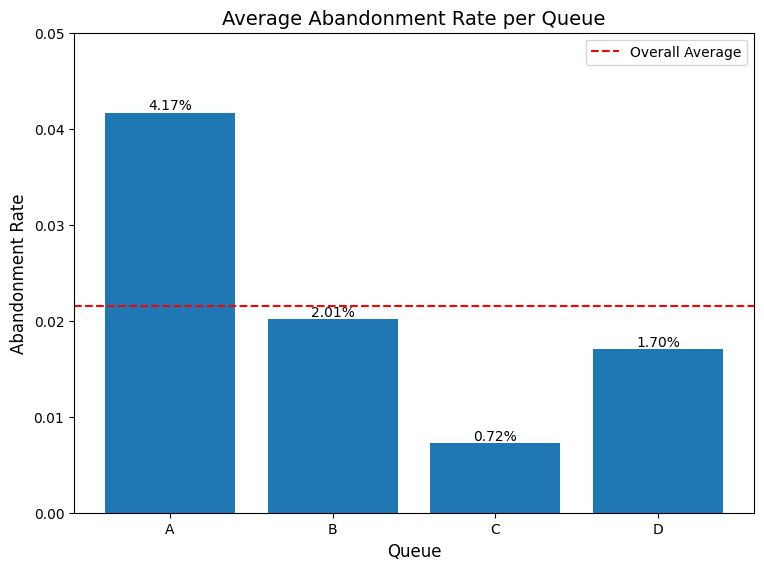

In [105]:
# Create visualization 1 here
# Import any additional libraries needed with alias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# The dictionary abandonment_rates has the data you need.
abandonment_rates = {}
queues = ["A", "B", "C", "D"]
queue_dict = df.groupby("Queue").agg("sum")
for queue in queues:
    abandonment_rates[queue] = queue_dict["Abandoned"].loc[queue] / queue_dict["Calls"].loc[queue] 

#Your code below:
#creating a bar chart:
plt.figure(figsize = (8,6))
bars = plt.bar(abandonment_rates.keys(),abandonment_rates.values())
#customizing the chart:
plt.title('Average Abandonment Rate per Queue',fontsize = 14)
plt.xlabel('Queue', fontsize = 12)
plt.ylabel('Abandonment Rate',fontsize = 12)
plt.ylim(0,max(abandonment_rates.values()) *1.2)
#adding value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.2%}',
             ha ='center',va ='bottom')

#add average line:
avg_rate = sum(abandonment_rates.values())/len(abandonment_rates)
plt.axhline(y = avg_rate, color ='r', linestyle='--',label ='Overall Average')
plt.legend()
#show the plot
plt.subplots_adjust(left = 0.1,right=0.95,top =0.9,bottom =0.1)
plt.show()



##### Record your answer below:

> Chart style you chose and why: I am chosing a bar chart for this question so that i can do easy comparison between the differnt queues.The height of each bar clearly represents abandonment rate and helps in identifying which queues has higher and lower rates.

#### Visualization 2: What is the service level percentage and average speed of answer for each rep in the North Branch?

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


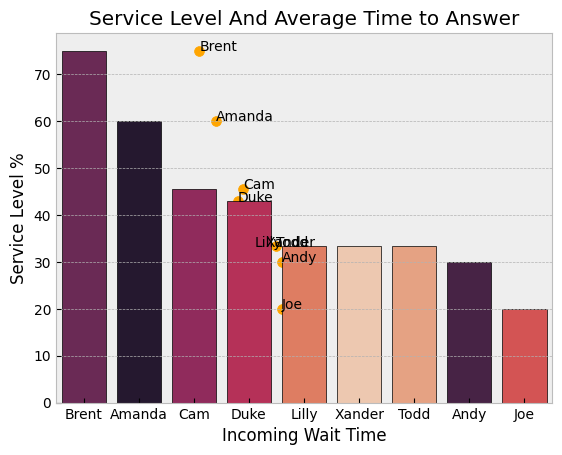

In [10]:
# Create visualization 2 here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
north_df = pd.read_csv(r"C:NorthCallCenter.csv")
# north_plt contains the data you need for the average speed of answer of each rep
north_plt = north_df.groupby("Rep ID")["Incoming Wait Time"].mean().to_frame().reset_index()

# Finding each Rep's Personal Service Level Percentage.  Basically, Calls within 2 secs / total calls

# Table 1: Total Incoming calls less than 2 seconds grouped by Rep
quick_calls = north_df[north_df["Incoming Wait Time"] <= 2.0]
quick_reps = quick_calls[["Rep ID", "Calls"]]
quick_stats = quick_reps.groupby(["Rep ID"]).sum()  # Final Table


# Table 2: Total Incoming Calls Only grouped by Rep
total_calls_in = north_df[north_df["Incoming or Outgoing"] == "Incoming"]
rep_calls = total_calls_in[["Rep ID", "Calls"]]     
total_stats = rep_calls.groupby(["Rep ID"]).sum() # Final Table  

#  Table 3: Service Level Percentage created via merge
service_level = pd.merge(quick_stats, total_stats, on="Rep ID")

# Create Percentage Column in Table 3
service_level["Service Level %"] = service_level["Calls_x"]/service_level["Calls_y"] * 100

#Your Code Here:
#north_plt.round(1)
#quick_stats
#total_stats
#service_level.rouund(1)
final_table = pd.merge(north_plt.round(1),service_level.round(1), on = 'Rep ID')
final_table = final_table.drop(columns=['Calls_x','Calls_y'])
final_table.groupby('Rep ID').sum()
final_table.plot(kind = 'scatter', y = 'Service Level %', x= 'Incoming Wait Time',title = 'Service Level And Average Time to Answer', c='orange',s=50)
for i, txt in enumerate(final_table['Rep ID']):
    plt.annotate(txt,(final_table['Incoming Wait Time'][i],final_table['Service Level %'][i]))
plt.style.use('bmh')
final_table.groupby('Rep ID').sum()
sns.barplot(data = final_table.groupby('Rep ID').sum(),x = 'Rep ID', y = 'Service Level %', hue = 'Rep ID',edgecolor = 'black', palette ='rocket',
order = final_table.sort_values(by = 'Service Level %', ascending = False)['Rep ID'])
print(plt.style.available)
            




##### Record your answer below:

> Chart style you chose and why: I am creating two visualizatios:
> 1) A scatterplot of Service level% vs Incoming Wait Time.
> 2) A bar plot of Service Level% for each Rep ID.
> 

#### Visualization 3: For each type of call purpose, how many calls are outgoing vs. incoming?

Call Purpose     Incoming or Outgoing
Complaint        Incoming                 51
Product Support  Outgoing                228
                 Incoming                 82
Sales Support    Outgoing                123
                 Incoming                 75
Name: count, dtype: int64
{'Incoming': 51}
{'Outgoing': 123, 'Incoming': 75}
{'Outgoing': 228, 'Incoming': 82}
{'complaints': [51, 0], 'Sales Support': [75, 123], 'product Support': [82, 228]}


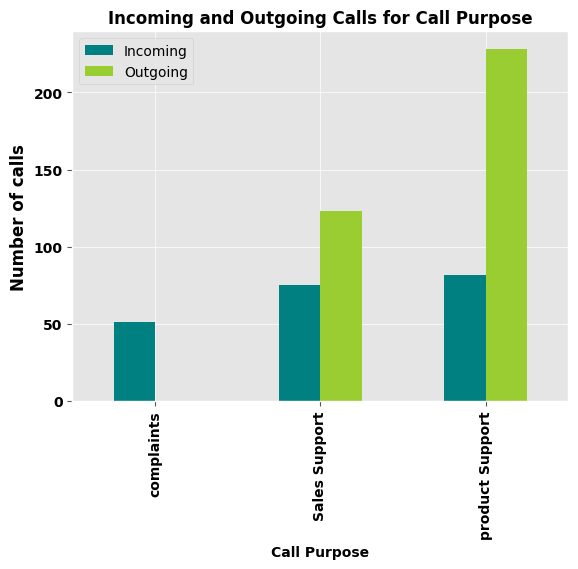

In [18]:
# Create visualization 3 here:
# The three dictionaries, complaints, sales_support, and product_support, have the information you need
north_df = pd.read_csv(r"C:NorthCallCenter.csv")
south_df = pd.read_csv(r"C:SouthCallCenter.csv")
df = pd.concat([north_df,south_df],ignore_index = True)
purpose_group = df.groupby("Call Purpose")
call_purpose = ["Complaint", "Product Support", "Sales Support"]
purpose_counts = purpose_group["Incoming or Outgoing"].value_counts()
print(purpose_counts)

complaints = purpose_counts["Complaint"].to_dict()
print(complaints)
sales_support = purpose_counts["Sales Support"].to_dict()
print(sales_support)
product_support = purpose_counts["Product Support"].to_dict()
print(product_support)
#Your Code Here:
call_support = {"complaints":[51,0],"Sales Support":[75,123],"product Support":[82,228]}
print(call_support)
plt.style.use('ggplot')
d= pd.DataFrame(call_support).T
d.plot(kind ='bar',color =['teal','yellowgreen'])
plt.xlabel('Call Purpose',color = 'black', fontsize = 10, fontweight = 'bold')
plt.ylabel('Number of calls',color ='black', fontsize =12, fontweight ='bold')
plt.title('Incoming and Outgoing Calls for Call Purpose', color ='black', fontsize = 12, fontweight ='bold')
plt.legend(['Incoming','Outgoing'],loc ='upper left', prop={'size':10},fontsize = 10)
plt.xticks(color = 'black',fontsize = 10, fontweight ='bold')
plt.yticks(color = 'black',fontsize = 10, fontweight ='bold')
plt.savefig('Complaintsand support grouped bar.png')
plt.show()
       
           

##### Record your answer below:

> Chart style you chose and why: I am creating a grouped bar chart showing the nunber of Incoming and Outgoing calls for each call purpose(Complaints, Sales Support and Product Support). The bars are color coded to easily distinguish between the two types of calls(Incoming and Outgoing).

## Task 5: Summarize Your Work

With what you know now about the two call centers and the entire company, answer the following questions. Note that while this is subjective, you should include relevant data to back up your opinion.


#### Summary Question 1:  Using KPIs such as average abandonment rate, service level and average speed of answer, in your opinion, which one of the two branches is operating more efficiently? Why?

##### Record your answer below:
> Your Answer:
- Based on the KPIs South Branch appears to be working slightly efficiently overall.
-South branch has significantly lower average call abandonment rate of 1.27% vs North branch 2.86%. While it is below the optimal range between 2-5%.So it means more people are staying online to recieve service.
-North branch has slightly higher pecentage of calls answered within 2 seconds of 40.24% vs South branch 38.10% whereas South branch handles more calls(48calls) vs North Branch (33 calls).
South Branch is little faster in answering the calls (3seconds) vs north branch (3.05 seconds).While the difference may be small it adds up over many calls and contributes to lower abandonment rate.


#### Summary Question 2: Based on the number of reps in each branch and how quickly the reps are working, in your opinion, which branch would benefit from the extra help?

##### Record your answer below:
> Your Answer: 
-Based on the number of reps i think North branch would benefit from the extra help.
-North Branch has 9 reps and South Branch has 11 reps. South Branch has 2 extra reps compared to North Branch.
-Looking at the performance metrics between both the branches looks similar.North branch reps must be working near capacity.
-North branch incoming wait time is 3.05 seconds compared to south branch 3seconds. Extra help to North branch could improve the incoming wait time and customer satisfaction.

#### Summary Question 3: Now that you have explored the datasets, is there any data or information that you wish you had in this analysis?

##### Record your answer below:
> Your Answer:
> I wish having customer satisfaction scores for each call and rep would help to correlate the efficiency metrics with customer satisfaction and helps to determine faster service always translates with better customer satisfaction.


## Bonus Mission
Create a visualization that answers this question: For each call purpose, how many calls (incoming and outgoing) take place in each time block?
##### Record your answer below:

> Chart style you chose and why: 

In [19]:
# Create your Bonus Mission visualization here!
call_times = df[["Time Block", "Call Purpose", "Incoming or Outgoing", "Calls"]]

# Use groupby to plot based on time blocks:

# Use groupby and get_group to select which call purpose to plot: